In [1]:
import pandas as pd
import torch

cols= ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
      "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
      "hours-per-week", "native-country", "label"]
df = pd.read_csv('adult.data', header=-1)
df = df.rename(columns = {i:c for i,c in enumerate(cols)})
df

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/_C.cpython-36m-darwin.so, 9): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/lib/libshm.dylib
  Reason: image not found

In [2]:
class MyData(torch.utils.data.Dataset):

    def __init__(self, df):
        self.data = df.drop('label', axis=1)
        self.label = df['label']
        self.n_samples = df.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, item):
        return torch.Tensor(self.data[item]), torch.Tensor(self.label[item])

NameError: name 'torch' is not defined

In [18]:
32*1018

32576

In [15]:
len(df)

32561

In [14]:
len(df) / 32

1017.53125

In [22]:
df[1:10]

1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8      >50K
9      >50K
Name: label, dtype: object

## Basic Data Exploration

In [20]:
import matplotlib.pyplot as plt

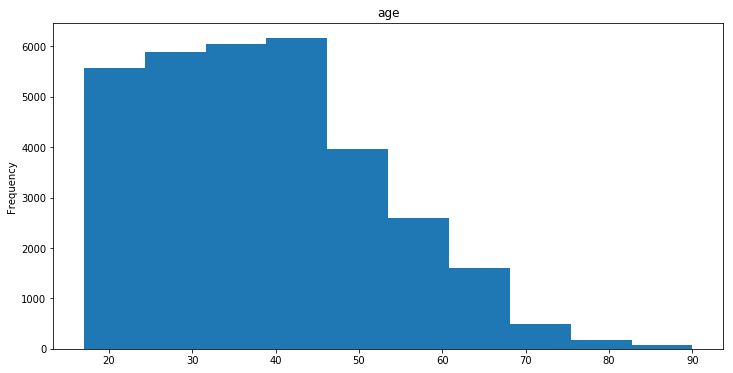

In [32]:
c = 0
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].plot.hist()    
plt.show()

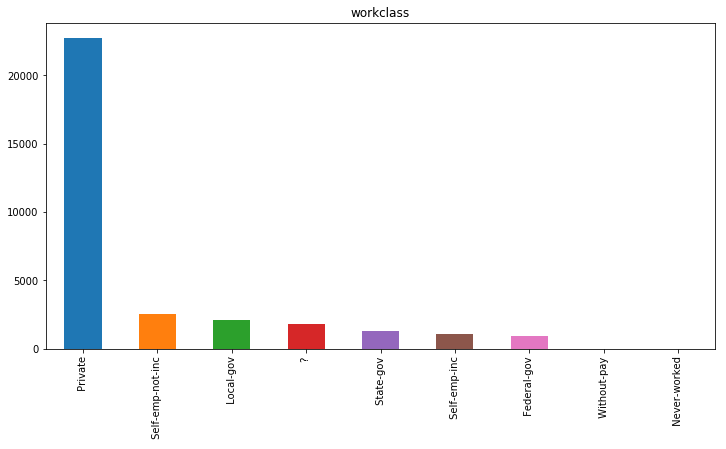

In [36]:
c = 1
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

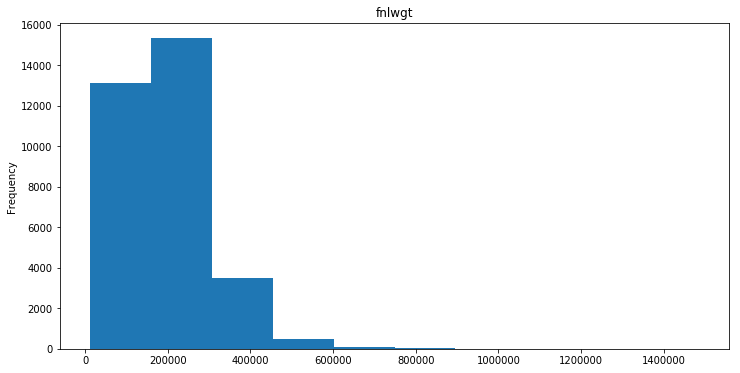

In [37]:
c = 2
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].plot.hist()    
plt.show()

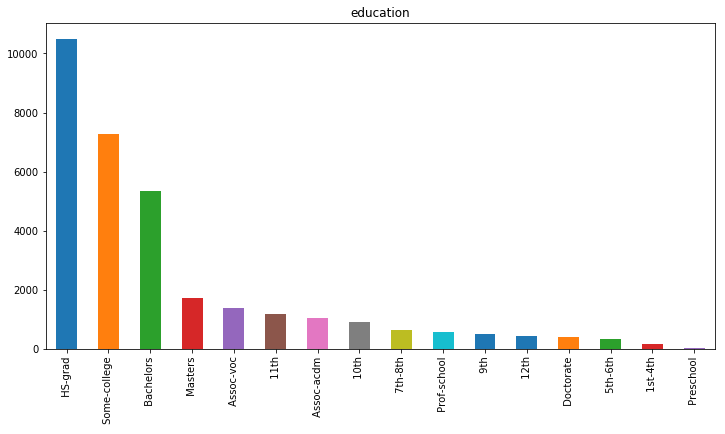

In [38]:
c = 3
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

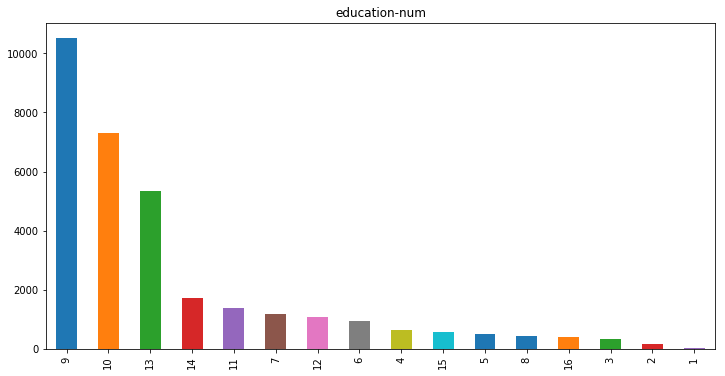

In [39]:
c = 4
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

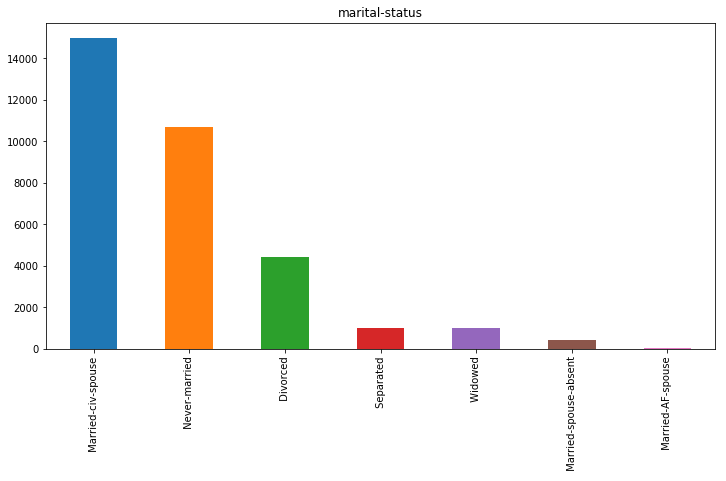

In [40]:
c = 5
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

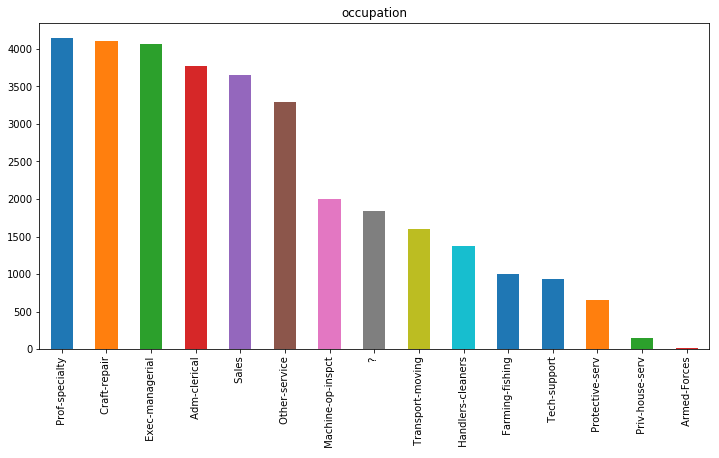

In [41]:
c = 6
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

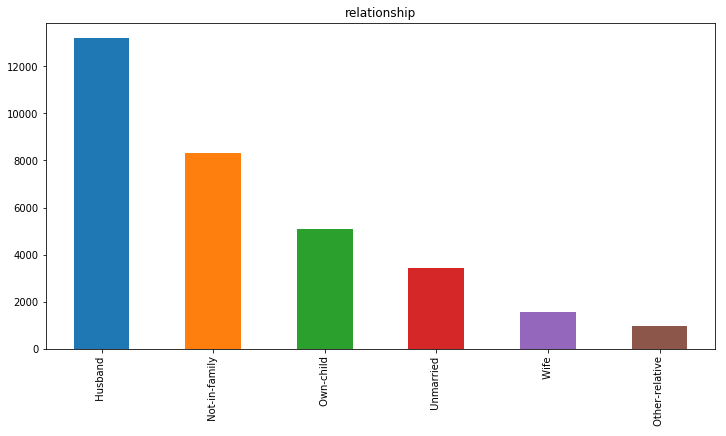

In [42]:
c = 7
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

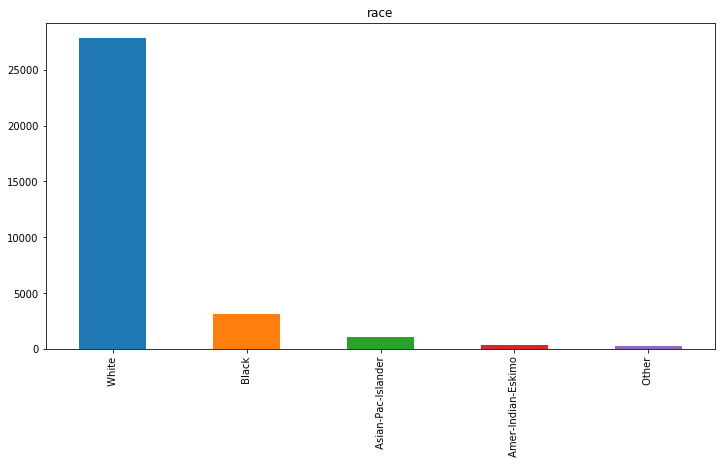

In [43]:
c = 8
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

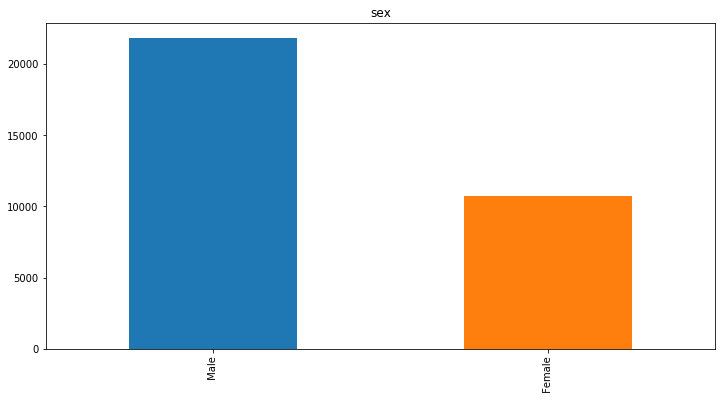

In [47]:
c = 9
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

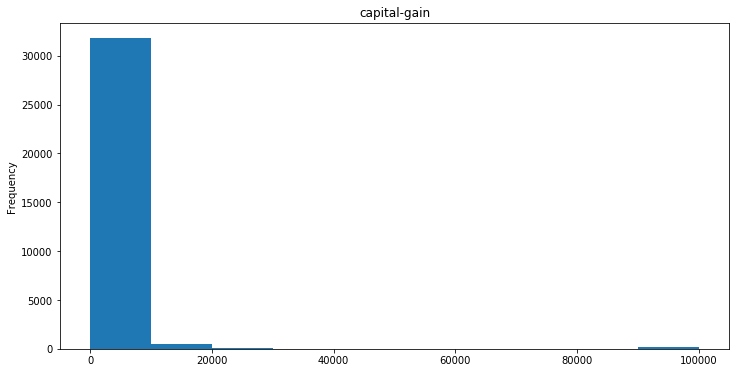

In [46]:
c = 10
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].plot.hist()    
plt.show()

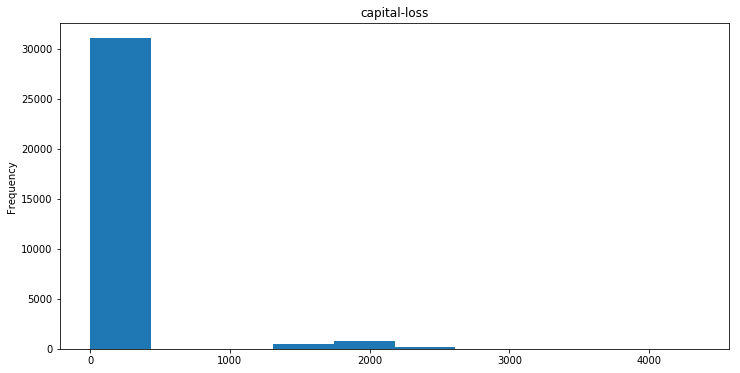

In [48]:
c = 11
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].plot.hist()    
plt.show()

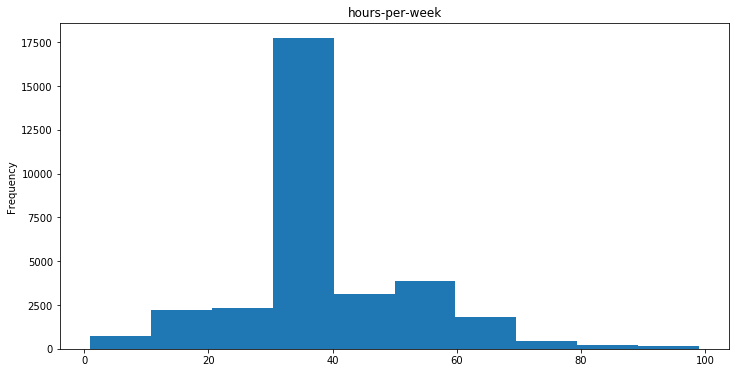

In [49]:
c = 12
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].plot.hist()    
plt.show()

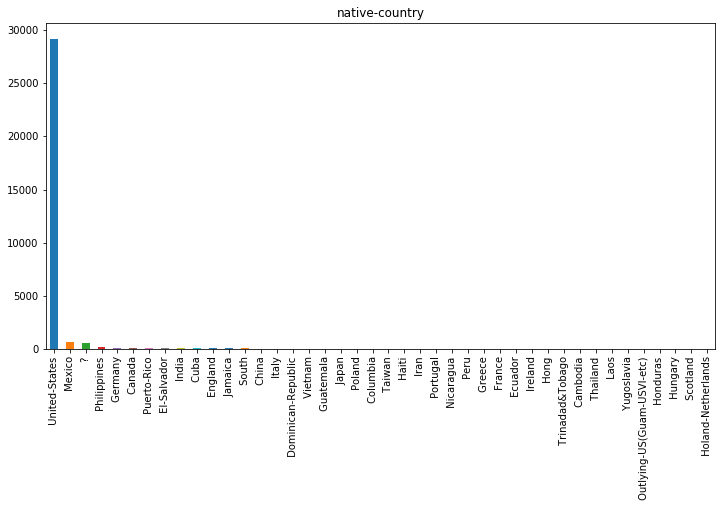

In [51]:
c = 13
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

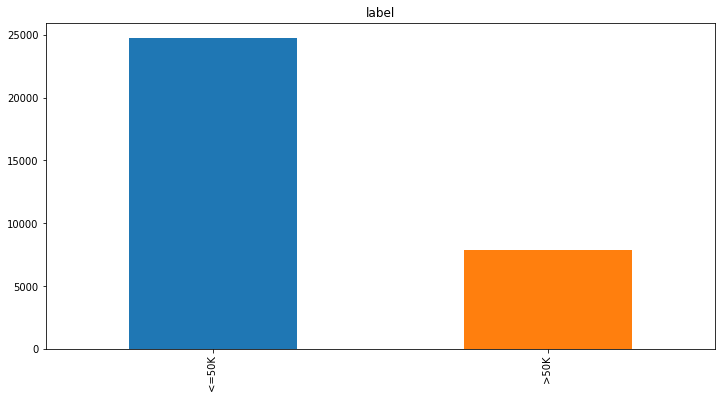

In [52]:
c = 14
plt.figure(figsize=(12,6))
plt.title(df.columns[c])
df.iloc[:,c].value_counts().plot.bar()  
plt.show()

What immediately jumps out to me is that this dataset is extremely unbalanced everywhere. Number of people of different races, genders, native country, etc... are extremely unbalanced. We know that there has been a lot of success with successfully classifying the desired attribute, income, but my guess would be that it relied highley on biases learned from the data.

## Normalize Data

In [53]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label'],
      dtype='object')

In [25]:
numeric_col = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
boolean_cols = ['sex', 'label']
category_cols = [ 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 
                 'native-country',]

In [26]:
for col in numeric_col:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

for bol in boolean_cols:
    df[bol] = df[bol].apply(lambda x: 0 if x == df[bol][0] else 1)
    
df = pd.get_dummies(df, columns=category_cols)

In [30]:
df.iloc[:,9:18].head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


## Neural Network Development